# <center>236501 - Introduction to Artificial Intelligence<br>HW3 Report</center>



| שם      |    email     |       Id |
|:-------:|:--------------:|:------:|
|אופיר שחטמן|  ofir.s@campus.technion.ac.il   |     206180374      | 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
#setup datasets
import utils
import numpy as np
X_train, y_train = utils.load_train()
X_test, y_test = utils.load_test()
from IPython.display import Markdown, display
printmd = lambda string: display(Markdown(string))
dict2str = lambda d: ', '.join([k+'='+str(v) for k,v in d.items()])

## 1. ID3

In [2]:
import ID3
ID3.main()

0.9469026548672567


## 3. Pruning

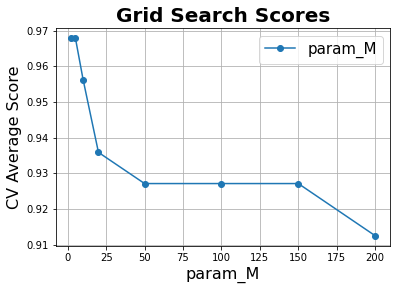

**best M** = 2

**test score** = 0.9469026548672567

In [3]:
# setup paramerets to cross-validation experiment
id3 = ID3.ID3()
parameters = {'M': [2, 5, 10, 20, 50, 100, 150, 200]}

# apply experiment
best_id3, best_M, best_score = utils.experiment(id3, X_train, y_train, parameters, plot=True)

# train all the train-set and get test-set score
printmd(f'**best M** = {best_M}')
test_score = best_id3.score(X_test, y_test)
printmd(f'**test score** = {test_score}')

## 4. KNN

In [4]:
import KNN
KNN.main()

0.9646017699115044


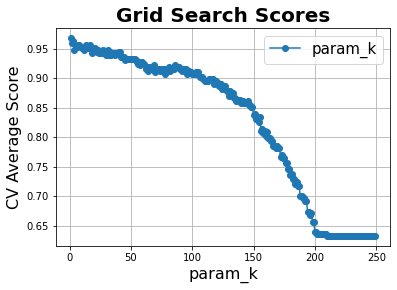

**best k** = 1

**test score** = 0.9646017699115044

In [5]:
# setup paramerets to cross-validation experiment
knn = KNN.KNNClassifier()
parameters = {'k': np.arange(1, 250)}

# apply experiment
best_knn, best_k, best_score = utils.experiment(knn, X_train, y_train, parameters, plot=True)

# train all the train-set and get test-set score
printmd(f'**best k** = {best_k}')
test_score = best_knn.score(X_test, y_test)
printmd(f'**test score** = {test_score}')

## 5. CostSensitiveKNN

In [6]:
import CostSensitiveKNN
CostSensitiveKNN.main()

0.0125


In [7]:
from CostSensitiveKNN import CostSensitiveKNN, sensitive_scorer, sensitive_loss
  
# apply experiment to the orginal knn
printmd('### Results without weighting:')
y_predicted = best_knn.predict(X_test)
printmd(f'**best loss** = {sensitive_loss(y_test, y_predicted)}\n')


printmd('### Results with weighting:')
# setup paramerets to cross-validation CostSensitiveKNN experiment
wknn = CostSensitiveKNN(k=None, w1=None, w2=None)
parameters = {'k': np.arange(1, 20), 'w1':np.arange(1, 20), 'w2':np.arange(0, 1, 0.1)}
# apply experiment
best_wknn, best_params, best_score = utils.experiment(wknn, X_train, y_train, parameters, scoring=sensitive_scorer, n_splits=7)


# train all the train-set and get test-set score
printmd(f'**best params:** {dict2str(best_params)}')
y_predicted = best_wknn.predict(X_test)
printmd(f'**best loss** = {sensitive_loss(y_test, y_predicted)}')

### Results without weighting:

**best loss** = 0.07455962059620595


### Results with weighting:

**best params** = {'k': 14, 'w1': 3, 'w2': 0.9}

**best loss** = 0.0125

## 6. KNN vs ID3

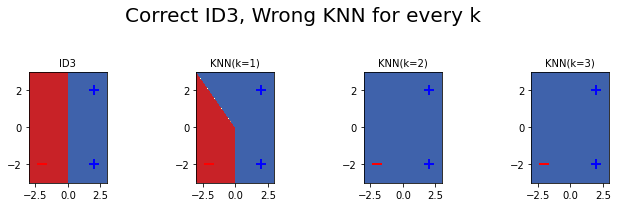

In [8]:
from KNN_vs_ID3 import KNN_vs_ID3
KNN_vs_ID3.plot_example1()

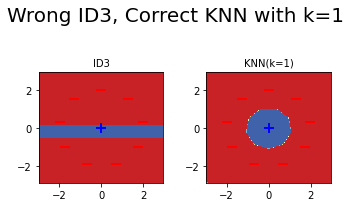

In [9]:
KNN_vs_ID3.plot_example2()

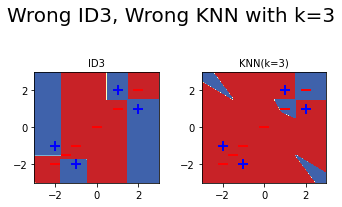

In [10]:
KNN_vs_ID3.plot_example3()

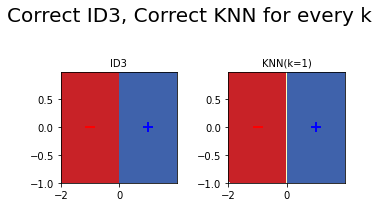

In [11]:
KNN_vs_ID3.plot_example4()

## 7. KNNForest

In [10]:
import KNNForest
KNNForest.main()

0.9734513274336283


In [ ]:
# setup paramerets to cross-validation experiment
knn_forest = KNNForest.KNNForest(N=None, k=None, M=None, p=None)
parameters = {'M': [2, 10], 'N': [20, 40], 'k': [15, 30], 'p': np.linspace(0.3, 0.7, num=3)}

# apply experiment
best_forest, best_params, best_score = utils.experiment(knn_forest, X_train, y_train, parameters, n_splits=5)

# train all the train-set and get test-set score
printmd(f'**best params:** {dict2str(best_params)}')
printmd(f'**best cross validetion score** = {best_score}')
test_score = best_forest.score(X_test, y_test)
printmd(f'**test score** = {test_score}')

## 8. improvedKNNForest

In [7]:
import improvedKNNForest
improvedKNNForest.main()

0.9911504424778761


In [6]:
# setup paramerets to cross-validation experiment
imp_knn_forest = improvedKNNForest.improvedKNNForest(N=None, k=None, M=None, p=None, p2=None)
parameters = {'M': [2, 10], 'N': range(10, 100, 10), 'k': range(10, 100, 10), 'p': np.linspace(0.3, 0.7, num=5), 'p2':np.arange(0.0,1.0,0.1)}

# apply experiment
best_forest, best_params, best_score = utils.experiment(imp_knn_forest, X_train, y_train, parameters, n_splits=5)

# train all the train-set and get test-set score
printmd(f'**best params:** {dict2str(best_params)}')
printmd(f'**best cross validetion score** = {best_score}')
test_score = best_forest.score(X_test, y_test)
printmd(f'**test score** = {test_score}')

NameError: name 'improvedKNNForest' is not defined